In [1]:
import besos.eppy_funcs as ef
from besos.evaluator import EvaluatorEH, EvaluatorEP
from besos.problem import EPProblem, EHProblem, Problem
from besos.objectives import VariableReader, MeterReader
from besos import objectives
from besos.parameters import RangeParameter, CategoryParameter, Parameter, FieldSelector, GenericSelector
from besos import config

import os

In [2]:
directory = './Building_models/5A_complete_data_sorted/no error/'
filename = 'SF+CZ5A+USA_IL_Chicago-OHare.Intl.AP.725300+gasfurnace+crawlspace+IECC_2018.idf'#'MF+CZ5A+USA_IL_Chicago-OHare.Intl.AP.725300+gasfurnace+crawlspace+IECC_2018.idf'

In [3]:
epw_path = './Creating_Heatwaves/HWYepws/HWY3_CAN_BC_Victoria.epw'
#epw_path = 'USA_TX_Houston-Intercontinental.722430_TMY2.epw'

In [4]:
print(filename)
building = ef.get_building(directory + filename)

SF+CZ5A+USA_IL_Chicago-OHare.Intl.AP.725300+gasfurnace+crawlspace+IECC_2018.idf


In [5]:
# Example for a setting a variable (of the cooling set points for all hours during the day)
EPparameters = []

EPparameters.append(Parameter(name='Cooling Setpoint (C)',
                           selector=FieldSelector(class_name='Schedule:Compact',
                                                  object_name='cooling_sch',field_name='Field 4'),
                           value_descriptors=RangeParameter(min_val=20.1,max_val=40)))

#EPparameters.append(Parameter(name='Heating Setpoint (C)',
#                           selector=FieldSelector(class_name='Schedule:Compact',
#                                                  object_name='heating_sch',field_name='Field 4'),
#                           value_descriptors=RangeParameter(min_val=16.1,max_val=20)))

In [6]:
# Example for collecting the hourly indoor air temperature of the building.
EPobjectives = []

outputs = ['Zone Mean Air Temperature', 'Zone Air Relative Humidity']
for output in outputs:
    for u in [1,]:
        for roomtype in ['LIVING', 'ATTIC', 'CRAWLSPACE']:
            EPobjectives.append(objectives.VariableReader(key_value = f'{roomtype}_UNIT{u}',variable_name = output, func=objectives.time_series_values))

#print(f'In total {len(EPobjectives)} output time series are stored.')
#EPobjectives = ['Electricity:Facility']

# Setting up the EnergyPlus simulation
problem = EPProblem(EPparameters,EPobjectives)
evaluator = EvaluatorEP(problem,building,epw=epw_path, out_dir='Outdir', err_dir='Errdir')

/home/user/.local/lib/python3.7/site-packages/besos/problem.py:152: RuntimeWarning: Duplicate names found. (duplicate, repetitions): [('Zone Mean Air Temperature', 3), ('Zone Air Relative Humidity', 3)]
Attempting to fix automatically
  f"Duplicate names found. (duplicate, repetitions): "


In [7]:
# Running a single simulation with cooling set point specified to be 23°C/22°C
results = evaluator.eval_single([40])

/home/user/.local/lib/python3.7/site-packages/besos/objectives.py:225: UserWarning: `time_series_values` is incomplete, and returns raw values, not time series values.
  "`time_series_values` is incomplete, and returns raw values, not time series values."


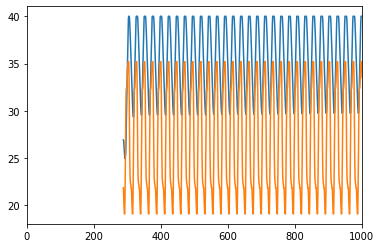

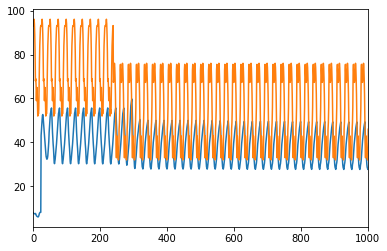

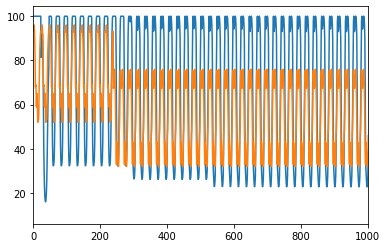

In [8]:
import pvlib
df, metadata = pvlib.iotools.read_epw(epw_path)

import matplotlib.pyplot as plt
df = df.reset_index(drop=True)
for i in range(3):
    results[i].iloc[48+10*24:].plot()
    df['temp_air'].iloc[48+10*24:].plot()
    plt.xlim([0,1000])
    plt.show()
    
for i in range(3):
    results[i+3].plot()
    df['relative_humidity'].plot()
    plt.xlim([0,1000])
    #plt.ylim([0,30])
    plt.show()

288     26.921142
289     26.811760
290     26.201987
291     25.553723
292     25.092016
          ...    
8803    39.606127
8804    38.742648
8805    37.781132
8806    36.681678
8807    35.548627
Name: Value, Length: 8520, dtype: float64